In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

import seaborn as sns

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
iris = pd.read_csv("iris.csv")
col_names = ["Sepal_length","Sepal_width","Petal_length","Petal_width","Class"]
pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data",sep=",",header =None,names=col_names)
random_subset = iris.sample(n=10)
print(random_subset.head(10))

     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
78                    6.0                  2.9                   4.5   
43                    5.0                  3.5                   1.6   
104                   6.5                  3.0                   5.8   
16                    5.4                  3.9                   1.3   
52                    6.9                  3.1                   4.9   
57                    4.9                  2.4                   3.3   
98                    5.1                  2.5                   3.0   
147                   6.5                  3.0                   5.2   
107                   7.3                  2.9                   6.3   
17                    5.1                  3.5                   1.4   

     Petal width (in cm)            Class  
78                   1.5  Iris-versicolor  
43                   0.6      Iris-setosa  
104                  2.2   Iris-virginica  
16                   0.4      I

In [4]:
iris.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [5]:
iris.isnull().values.any()

False

# There is no missing value

In [6]:
from sklearn.preprocessing import Imputer
iris1 = iris.drop("Class",axis=1)
imp = Imputer(missing_values="NaN",strategy="median",axis=0)
# updating missing value with median values
iris.iloc[:,0:4] = imp.fit_transform(iris.iloc[:,0:4])
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [7]:
iris['Class'] = pd.factorize(iris['Class'])[0]

In [8]:
iris.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [9]:
iris_corr = iris.corr(method = "pearson")
iris_corr.loc['Sepal Length (in cm)':'Petal width (in cm)','Class']

Sepal Length (in cm)    0.782561
Sepal Width in (cm)    -0.419446
Petal length (in cm)    0.949043
Petal width (in cm)     0.956464
Name: Class, dtype: float64

# There are no features which are in range of -0.1 to 0.1

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [10]:
print(iris.iloc[:,0:4].var())
iris.iloc[:,0:4].var()<0.1

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
dtype: float64


Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
dtype: bool

## Question 6

*Plot the scatter matrix for all the variables.*

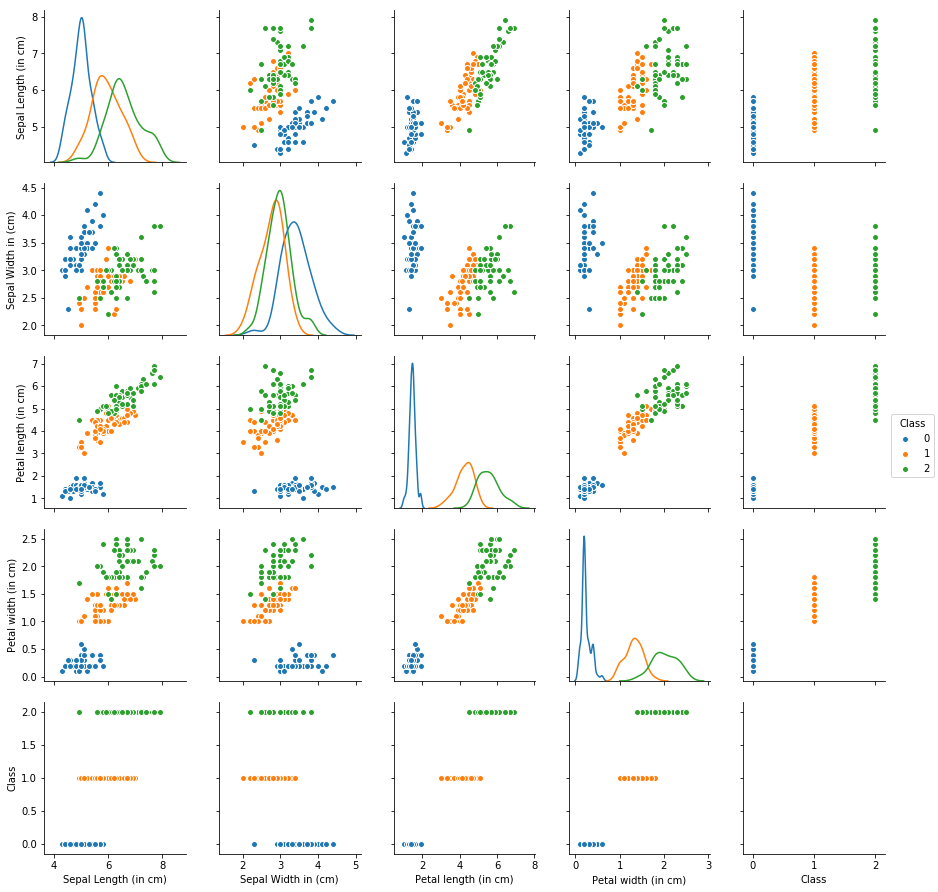

In [11]:
sns.pairplot(iris, hue='Class', diag_kind = 'kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [12]:
X = iris.drop(columns='Class',axis=1)
y = iris[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [13]:
NNH = KNeighborsClassifier(n_neighbors= 3)
print(NNH.fit(X_train, y_train))

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


C:\Users\rames\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


1.0

In [14]:
NNH = KNeighborsClassifier(n_neighbors= 5)
print(NNH.fit(X_train, y_train))

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


C:\Users\rames\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


1.0

In [15]:
NNH = KNeighborsClassifier(n_neighbors= 9)
print(NNH.fit(X_train, y_train))

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


C:\Users\rames\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9666666666666667

In [16]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(30, 4)
(120, 4)
(30, 1)
(120, 1)


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [17]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

def knn(n):
    NNH = KNeighborsClassifier(n_neighbors= n)
    NNH.fit(X_train, y_train)
    #scores = cross_val_score(NNH, X_train, y_train, cv=10)
    y_predict = NNH.predict(X_test)
    test_score = NNH.score(X_test, y_test)
    return 1- test_score

MSE = []

for i in range(1,21,2):
    MSE.append([i,knn(i)])
print(MSE)

[[1, 0.0], [3, 0.0], [5, 0.0], [7, 0.033333333333333326], [9, 0.033333333333333326], [11, 0.033333333333333326], [13, 0.033333333333333326], [15, 0.033333333333333326], [17, 0.033333333333333326], [19, 0.033333333333333326]]


C:\Users\rames\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\rames\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\rames\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\rames\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

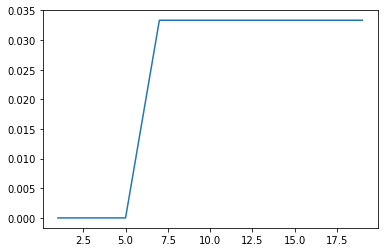

In [18]:
df2 = pd.DataFrame(MSE)
df2
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df2[0],df2[1])

# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [19]:
math = pd.read_csv("student-mat.csv")

# Question 2 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [20]:
math.index.name = "number"
print(math.head(4))

       school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   

       ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
number ...                                                                 
0      ...      4        3      4     1     1      3        6   5   6   6  
1      ...      5        3      3     1     1      3        4   5   5   6  
2      ...      4        3      2     2     3      3       10   7   8  10  
3      ...      3        2      2     1     1      5        2  15  14  15  

[4 rows x 33 columns]


In [21]:
math.columns.isna().any()
math.dropna(inplace = True)

# Transform Data

## Question 3

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [22]:
math.select_dtypes(exclude='number').dtypes

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

# Question 4 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [23]:
math.var()<1

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 5 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [24]:
math.drop(math.var()[math.var()<1].index.values,inplace=True,axis=1)
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


# Question 6 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [25]:
print(math.var()<1)
print(math.shape)

age         False
Medu        False
Fedu        False
goout       False
Walc        False
health      False
absences    False
G1          False
G2          False
G3          False
dtype: bool
(395, 27)


# Question 7

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

Answer

# Question 8 - Training and testing data split

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

# Question 9 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

# Question 10 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

# Question 11 - Print the coefficients of the model and name the coefficient which has the highest impact on the dependent variable

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

# Question 12 - Predict the dependent variable for both training and test dataset

Accuracy score() should help you to print the accuracies